In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
# Importing the dataset
import pandas as pd
dataset = pd.read_csv("../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

# 1. Data Analysis

In [3]:
# Displaying the head of out dataset
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Displaying the datatype and shape of the dataset

print(dataset.shape)
dataset.dtypes

(200, 5)


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
# Displaying the describe statistical info of each attribute
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# a. Histogram Distribution Visualisation

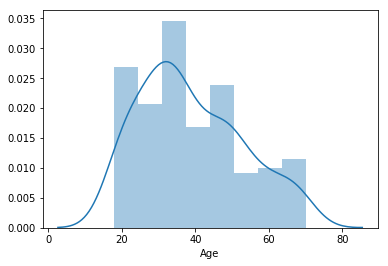

In [6]:
# Histogram visualisation for age column and know what kind of distribution  it is ?

import seaborn as sb
sb.distplot(dataset['Age'])

Age Attribute having similar kind of normal distribution with wider Standard Deviation.

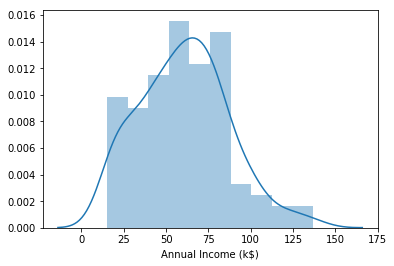

In [7]:
# Histogram visualisation for Annual income column and know what kind of distribution  it is ?

sb.distplot(dataset['Annual Income (k$)'])

Above Histogram plot Annual income column data looks like normal distribution with wider Standard deviation

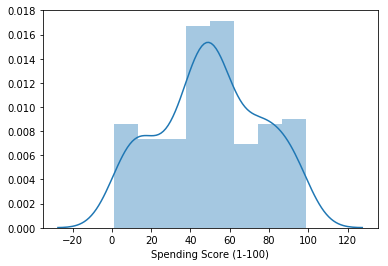

In [8]:
# Histogram visualiation for Spending Score column and to know what kind of distribution it is?

sb.distplot(dataset['Spending Score (1-100)'])

# b. HeatMap Correlation Visualisation

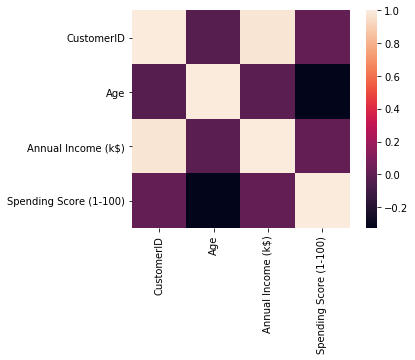

In [9]:
# Visualisation correlation coefficient of each attribute.

corr_value=dataset.corr()
sb.heatmap(corr_value,square=True)

We can't display the correlation coefficient values in heatmap, Because each attribute finds the coefficient value with output attribute.

Here we dont have output attribute because it is an un-supervised learning. Here we are segmenting the culster of categories based on annual income and spending score.

# Feature Engineering

# a. Data Cleaning

In [10]:
# Displying any empty or null values in our dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
# Displying the empty or null value in our dataset to understand better how many missing cells there in each attribute

dataset.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Perfect we don't have any missing values in our dataset so no need to remove any columns and rows..

CustomerID is not required to make segementation cluster

In [12]:
# Dropping CustomerID column 

dataset=dataset.drop(['CustomerID'],axis=1)
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# b. Label Encoder

In [13]:
# Encoding the Gender column from categorical value into numerical value

dataset['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [14]:
dataset['Gender']=dataset['Gender'].map({'Male':0,'Female':1})
dataset['Gender'].unique()

array([0, 1])

In [15]:
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


# c. Outliers

In unsupervised algorithm we wont have ouput attribute so we cant predict the outliters here.

# d. OneHotEncoder

As we done encoding the label of gender column, We dont need to apply onehotencoder because labeled values in between 0 and 1 only. So no need to apply one Hot Encoder.

# e. Feature Split

Split the dataframe feature into input attribute of array of matrix

In [16]:
# Feature Split
x=dataset.values

print(x[:5,:])

[[ 0 19 15 39]
 [ 0 21 15 81]
 [ 1 20 16  6]
 [ 1 23 16 77]
 [ 1 31 17 40]]


# f. Feature Scale

Applying the rescale technique to keep all input attribute value in the range of 0 to 1 by using MinMaxScaler

In [17]:
# Feature Scale

from sklearn.preprocessing import MinMaxScaler
minmaxscaler=MinMaxScaler()
x=minmaxscaler.fit_transform(x)
print(x[:5,:])

[[0.         0.01923077 0.         0.3877551 ]
 [0.         0.05769231 0.         0.81632653]
 [1.         0.03846154 0.00819672 0.05102041]
 [1.         0.09615385 0.00819672 0.7755102 ]
 [1.         0.25       0.01639344 0.39795918]]


# 2. Modeling

To find optimal number of segmentation (Clusters) we are going to use Elbow Method.

Elbow Method is used get optimal no.of cluster value with elbow visualisation graph.

# a. K-Means

# K-Means Elbow Method

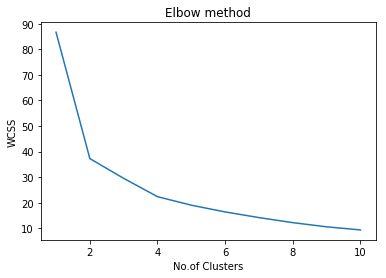

In [18]:
# Elbow Method

seed=5

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss=[]
# n_init ----- Number of kmeans will run with different init centroids
# max_iter------ Max Number of iterations to define that the final clusters
# init='k-means++' ---- random initlization to handle random intialization trap
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=500,n_init=20,random_state=seed)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("No.of Clusters")
plt.ylabel('WCSS')
plt.show()

As per the above optimal Elbow method graph 4 cluster segemnetation will be great...

In [19]:
# K-Means Cluster Algorithm
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=seed,max_iter=500,n_init=20)
y_kmeans=kmeans.fit_predict(x)

# Predicting the Customers with different segments
print(y_kmeans)


[2 2 3 0 0 0 3 0 1 0 1 0 3 0 1 2 3 2 1 0 1 2 3 2 3 2 3 2 3 0 1 0 1 2 3 0 3
 0 3 0 3 2 1 0 3 0 3 0 0 0 3 2 0 1 3 1 3 1 0 1 1 2 3 3 1 2 3 3 2 0 1 3 3 3
 1 2 3 1 0 3 1 2 1 3 0 1 3 0 0 3 3 2 1 3 0 2 3 0 1 2 0 3 1 2 1 0 3 1 1 1 1
 0 3 2 0 0 3 3 3 3 2 3 0 2 0 0 1 2 1 2 1 2 0 0 1 0 3 2 1 0 3 2 0 0 1 2 1 0
 3 2 1 2 3 0 3 0 1 0 1 0 3 0 1 0 1 0 1 0 3 2 1 2 1 2 3 0 1 2 1 2 3 0 1 0 3
 2 3 2 3 0 3 0 1 0 3 0 3 2 1 2]


# Visualising Result And Its Clusters.

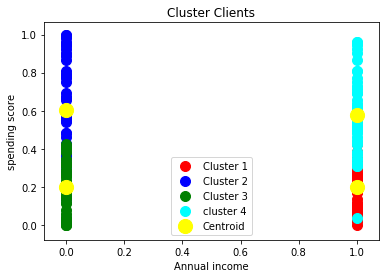

In [20]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,color='red',label='Cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,color='blue',label='Cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,color='green',label='Cluster 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,color='cyan',label='cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,color='yellow',label='Centroid')
plt.title("Cluster Clients")
plt.xlabel('Annual income')
plt.ylabel('spending score')
plt.legend()
plt.show()

# b. Hierarchical Cluster

# Hierarchical Dendo Gram

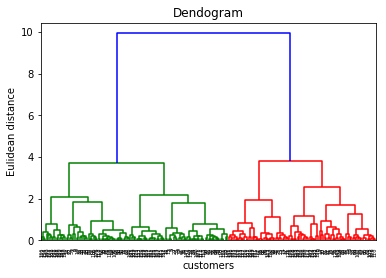

In [21]:
# Dendo Gram plot is used to find optimal number of cluster..

import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendogram')
plt.xlabel('customers')
plt.ylabel('Eulidean distance')
plt.show()

As per Eulidean distance 3 giving the 4 optimal no.of clusters and because those 4 lines not interceting any lines.

In [22]:
# Hierarchical Clustering Algorithm to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=4)
hc.fit(x)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [23]:

# Predict the cluster categories based on mall dataset
y_hc=hc.fit_predict(x)
print(y_hc)

[0 2 3 1 3 1 3 1 0 1 0 1 3 1 0 2 3 2 0 1 0 2 3 2 3 2 3 0 3 1 0 1 0 2 3 1 3
 1 3 1 3 2 0 1 3 1 3 1 1 1 3 0 1 0 3 0 3 0 1 0 0 2 3 3 0 2 3 3 2 1 0 3 3 3
 0 2 3 0 1 3 0 0 0 3 1 0 3 1 1 3 3 2 0 1 1 2 3 1 0 2 1 3 0 2 0 1 3 0 0 0 0
 1 1 2 1 1 3 3 3 3 2 1 1 2 1 1 0 2 0 2 0 2 1 1 0 1 3 2 0 1 3 2 1 1 0 2 0 1
 3 2 0 2 3 1 3 1 0 1 0 1 3 1 0 1 0 1 0 1 3 2 0 2 0 2 3 1 0 2 0 2 3 1 0 1 3
 2 3 2 3 1 3 1 0 1 3 1 3 2 0 2]


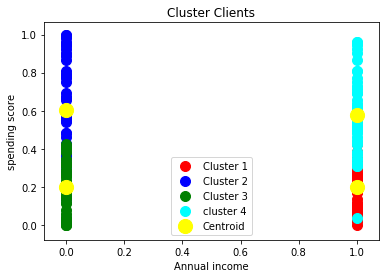

In [24]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,color='red',label='Cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,color='blue',label='Cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,color='green',label='Cluster 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,color='cyan',label='cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,color='yellow',label='Centroid')
plt.title("Cluster Clients")
plt.xlabel('Annual income')
plt.ylabel('spending score')
plt.legend()
plt.show()

Both K-Means and Hierarchical Cluster will be great algorithms for unsupervised cluster kind of problems but K-Means will give great performance......

If any questions please let me know...